In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import csv

In [6]:
#File is Total alcohols by country and year, UOM Liters per Capita 
# Specify the file path
file_path = './8_Per_Capita_Consumption_Not_Separated_by_Gender_1960_2016.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df)

,SpatialDim,ParentLocationCode,TimeDim,TimeDimensionValue,SPIRITS_PER_CAPITA,BEER_PER_CAPITA,WINE_PER_CAPITA,OTHER_ALCOHOL_PER_CAPITA,ALL_ALCOHOLS_PER_CAPITA
0,AFG,EMR,1961,1961,0.00,0.00,0.00,0,0.00
1,AFG,EMR,1962,1962,0.00,0.00,0.00,0,0.00
2,AFG,EMR,1963,1963,0.00,0.00,0.00,0,0.00
3,AFG,EMR,1964,1964,0.00,0.00,0.00,0,0.00
4,AFG,EMR,1965,1965,0.00,0.00,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...
9512,ZWE,AFR,2011,2011,0.64,4.10,0.25,0,9.34
9513,ZWE,AFR,2012,2012,0.88,4.14,0.17,0,9.54
9514,ZWE,AFR,2013,2013,0.75,4.17,0.18,0,9.73
9515,ZWE,AFR,2014,2014,0.86,4.35,0.10,0,9.94


In [12]:
df.shape

(9517, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SpatialDim                9517 non-null   object 
 1   ParentLocationCode        9517 non-null   object 
 2   TimeDim                   9517 non-null   int64  
 3   TimeDimensionValue        9517 non-null   int64  
 4   SPIRITS_PER_CAPITA        9517 non-null   float64
 5   BEER_PER_CAPITA           9517 non-null   float64
 6   WINE_PER_CAPITA           9517 non-null   float64
 7   OTHER_ALCOHOL_PER_CAPITA  9517 non-null   int64  
 8   ALL_ALCOHOLS_PER_CAPITA   9517 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 669.3+ KB


In [17]:
df['SpatialDim'].value_counts(normalize=True)*100

SpatialDim
DZA    0.588421
POL    0.588421
NZL    0.588421
OMN    0.588421
PAK    0.588421
         ...   
MDV    0.168120
NRU    0.157613
PRI    0.157613
MCO    0.115583
MNE    0.115583
Name: proportion, Length: 193, dtype: float64

In [ ]:
# top 5 countries = >x% suggestions 

In [18]:
df['ParentLocationCode'].value_counts(normalize=True)*100

ParentLocationCode
AFR     26.279290
EUR     23.767994
AMR     19.354839
WPR     12.808658
EMR     11.989072
SEAR     5.800147
Name: proportion, dtype: float64

In [21]:
df.groupby(['ParentLocationCode'])["SPIRITS_PER_CAPITA"].agg(Mean="mean",Total="sum",Count="count",Min="min",Max="max")

,Mean,Total,Count,Min,Max
ParentLocationCode,,,,,
AFR,0.494710,1237.270,2501,0.0,8.58
AMR,3.627780,6682.370,1842,0.0,16.56
EMR,0.593891,677.630,1141,0.0,13.40
EUR,3.350765,7579.430,2262,0.0,17.15
SEAR,1.255924,693.270,552,0.0,9.66
WPR,1.456922,1775.988,1219,0.0,14.29


In [22]:
df.groupby(['ParentLocationCode','TimeDimensionValue'])["SPIRITS_PER_CAPITA"].agg(Mean="mean",Total="sum",Count="count",Min="min",Max="max")

Mean  Total  Count   Min   Max
ParentLocationCode TimeDimensionValue                                    
AFR                1961                0.316000  14.22     45  0.00  2.23
                   1962                0.314222  14.14     45  0.00  2.27
                   1963                0.287333  12.93     45  0.00  2.50
                   1964                0.447556  20.14     45  0.00  7.59
                   1965                0.269778  12.14     45  0.00  1.92
...                                         ...    ...    ...   ...   ...
WPR                2012                2.502400  62.56     25  0.00  8.34
                   2013                2.244000  56.10     25  0.00  8.24
                   2014                1.767000  35.34     20  0.00  7.48
                   2015                1.240500  24.81     20  0.00  3.94
                   2016                1.505000  12.04      8  0.11  3.86

[338 rows x 5 columns]

In [26]:
df.groupby(['ParentLocationCode','TimeDimensionValue'],as_index=False)["SPIRITS_PER_CAPITA"].agg(Mean="mean",Total="sum",Count="count",Min="min",Max="max")

,ParentLocationCode,TimeDimensionValue,Mean,Total,Count,Min,Max
0,AFR,1961,0.316000,14.22,45,0.00,2.23
1,AFR,1962,0.314222,14.14,45,0.00,2.27
2,AFR,1963,0.287333,12.93,45,0.00,2.50
3,AFR,1964,0.447556,20.14,45,0.00,7.59
4,AFR,1965,0.269778,12.14,45,0.00,1.92
...,...,...,...,...,...,...,...
333,WPR,2012,2.502400,62.56,25,0.00,8.34
334,WPR,2013,2.244000,56.10,25,0.00,8.24
335,WPR,2014,1.767000,35.34,20,0.00,7.48
336,WPR,2015,1.240500,24.81,20,0.00,3.94


In [27]:
stats= df.groupby(['ParentLocationCode','TimeDimensionValue'],as_index=False)["SPIRITS_PER_CAPITA"].agg(Mean="mean",Total="sum",Count="count",Min="min",Max="max")

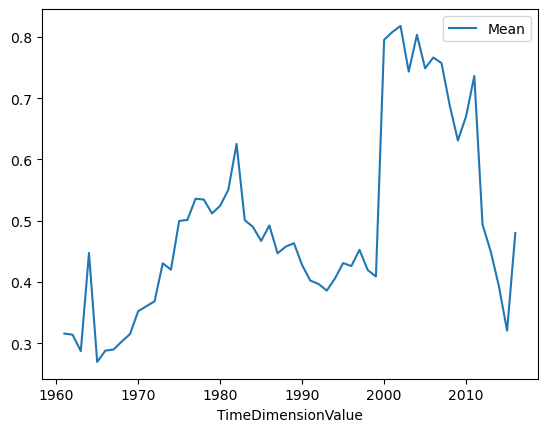

In [29]:
singleregion= stats[stats["ParentLocationCode"]=="AFR"][["Mean","TimeDimensionValue"]]  # selects just this country creates df,
pd.to_datetime(singleregion['TimeDimensionValue'], format='%Y') # convert the timedim from int ot date time

singleregion.plot(x="TimeDimensionValue", y="Mean")

plt.show()

In [ ]:




#
# plt.plot(stats['TimeDimensionValue'], stats['SPIRITS_PER_CAPITA'], label=country)

# # Set labels and title
# plt.xlabel('Year')
# plt.ylabel('Spirits Per Capita')
# plt.title('Spirits Per Capita Trends Over Time by Country (Excluding Zero Values), 1996 onwards')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# # Show plot
# plt.show()

In [ ]:
# goal 1)-- find the fastest growing countries in the spirits space, plot their growth 
# goal 2)-- find the countries where spirits are drink of choice / least choice drink



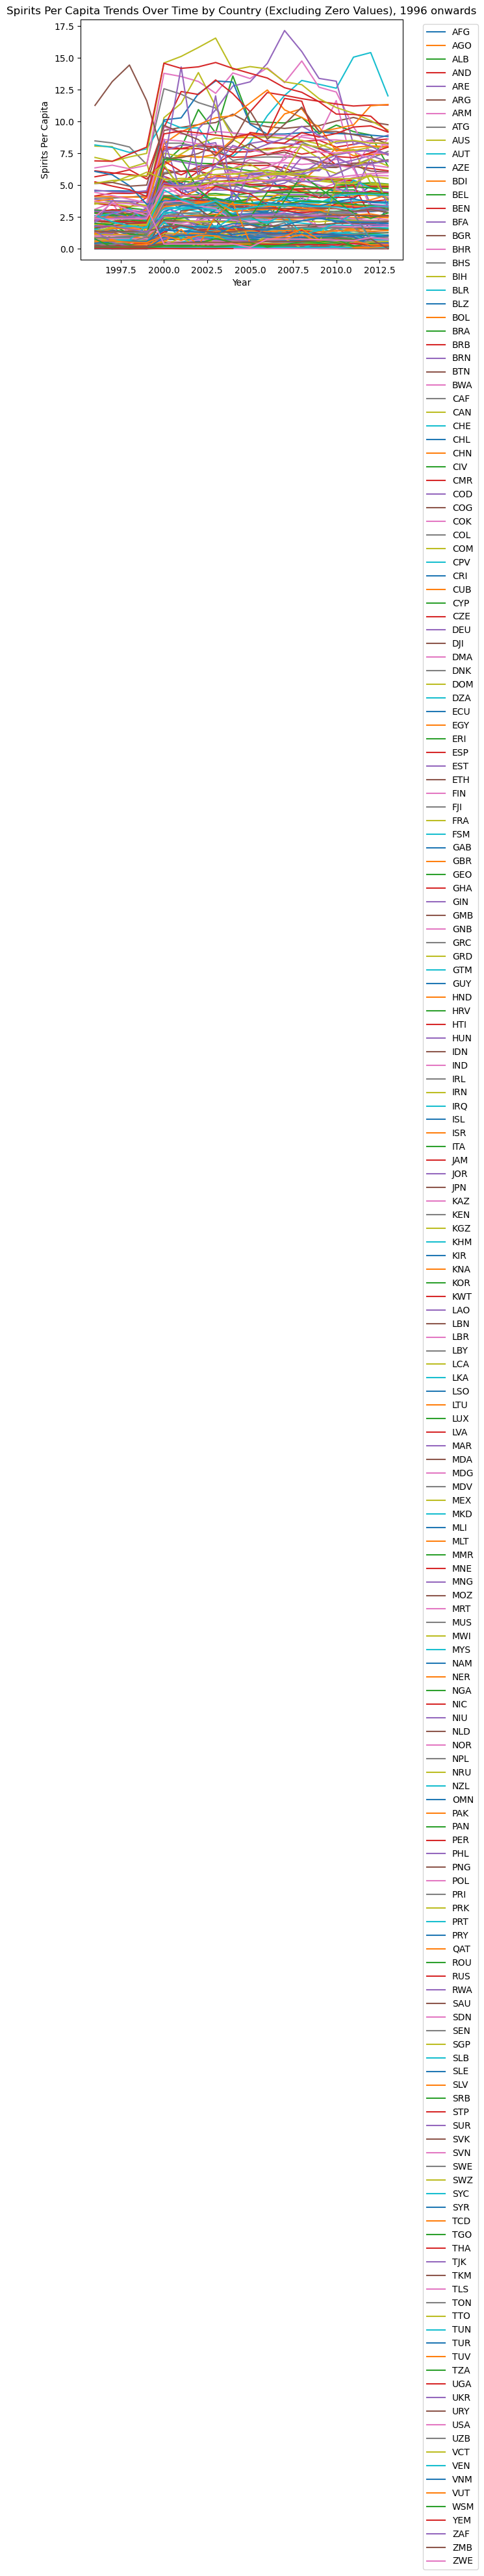

In [10]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./8_Per_Capita_Consumption_Not_Separated_by_Gender_1960_2016.csv')

# Filter the DataFrame to include only SPIRITS_PER_CAPITA data
spirits_df = df[['SpatialDim', 'TimeDim', 'SPIRITS_PER_CAPITA']]

# Filter the DataFrame to include only data from the year 1996 forward
spirits_df = spirits_df[(spirits_df['TimeDim'] >= 1996) & (spirits_df['TimeDim'] <= 2013)]


# Group the data by country and year, and calculate the mean spirits per capita
spirits_by_country = spirits_df.groupby(['SpatialDim', 'TimeDim']).mean().reset_index()

# Iterate over each unique country and plot its spirits per capita trend
for country in spirits_by_country['SpatialDim'].unique():
    country_data = spirits_by_country[(spirits_by_country['SpatialDim'] == country) & 
                                      (spirits_by_country['SPIRITS_PER_CAPITA'] != 0)]
    if not country_data.empty:
        plt.plot(country_data['TimeDim'], country_data['SPIRITS_PER_CAPITA'], label=country)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Spirits Per Capita')
plt.title('Spirits Per Capita Trends Over Time by Country (Excluding Zero Values), 1996 onwards')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Show plot
plt.show()